<a href="https://colab.research.google.com/github/nivedanyakolli361/CNN1/blob/main/Models/My_Model_Normal_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Convolution Neural Network

# Part 1 - Building CNN Architecture and Importing Data
import tensorflow as tf
# Importing the Keras libraries and packages
# 'Sequential' library used to Initialize NN as sequence of layers (Alternative to Graph initialization)
from keras.models import Sequential

# 'Conv2D' for 1st step of adding convolution layers to images ('Conv3D' for videos with time as 3rd dimension)
from keras.layers import Conv2D

# 'MaxPooling2D' step 2 for pooling of max values from Convolution Layers
from keras.layers import MaxPooling2D

# 'Flatten' Pooled Layers for step 3
from keras.layers import Flatten

# 'Dense' for fully connected layers that feed into classic ANN
from keras.layers import Dense

In [3]:
import tensorflow as tf 
device__list = tf.test.gpu_device_name()
device__list

'/device:GPU:0'

In [4]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[190, 190, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

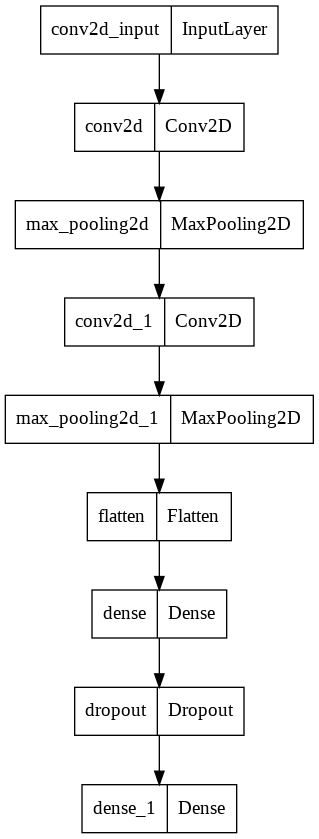

In [6]:
# plot graph
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Normal_CNN.png')

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training',
                                                 target_size = (190, 190),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Test',
                                            target_size = (190, 190),
                                            batch_size = 32,
                                            class_mode = 'binary')

val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Validation',
                                            target_size = (190, 190),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2003 images belonging to 2 classes.
Found 428 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [9]:
r = cnn.fit(training_set, 
            validation_data = val_set, 
            epochs = 16)

Epoch 1/16
63/63 [==============================] - 879s 14s/step - loss: 0.9025 - accuracy: 0.5921 - val_loss: 0.5636 - val_accuracy: 0.7465
Epoch 2/16
63/63 [==============================] - 26s 419ms/step - loss: 0.5581 - accuracy: 0.7109 - val_loss: 0.5609 - val_accuracy: 0.7465
Epoch 3/16
63/63 [==============================] - 26s 417ms/step - loss: 0.5380 - accuracy: 0.7364 - val_loss: 0.6173 - val_accuracy: 0.5907
Epoch 4/16
63/63 [==============================] - 26s 418ms/step - loss: 0.5081 - accuracy: 0.7614 - val_loss: 0.5279 - val_accuracy: 0.7256
Epoch 5/16
63/63 [==============================] - 27s 430ms/step - loss: 0.4835 - accuracy: 0.7644 - val_loss: 0.5602 - val_accuracy: 0.7605
Epoch 6/16
63/63 [==============================] - 26s 418ms/step - loss: 0.4701 - accuracy: 0.7713 - val_loss: 0.4727 - val_accuracy: 0.7372
Epoch 7/16
63/63 [==============================] - 26s 416ms/step - loss: 0.4262 - accuracy: 0.8108 - val_loss: 0.5161 - val_accuracy: 0.7209


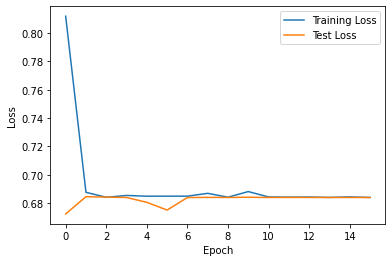

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

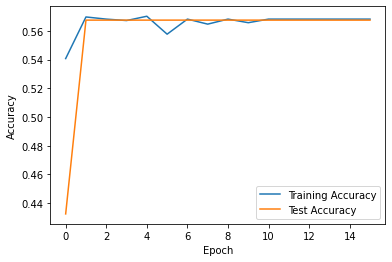

In [22]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [11]:
path = '/content/drive/MyDrive/OKC_and_NonOKC_Dataset/my_model_Normal_CNN.h5'

cnn.save(path)

In [12]:
from keras.models import load_model
cd = load_model('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/my_model_Normal_CNN_New.h5')

In [13]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_0.jpg', target_size = (190, 190))

# Add a 3rd Color dimension to match Model expectation
test_image = image.img_to_array(test_image)

# Add one more dimension to beginning of image array so 'Predict' function can receive it (corresponds to Batch, even if only 
# one batch)
test_image = np.expand_dims(test_image, axis = 0)
result = cd.predict(test_image)
print(result)

[[0.]]


In [14]:
training_set.class_indices

# Map is 2D so check the first row, first column value
if result[0][0] > 0.5:
    prediction = 'Normal'
else:
    prediction = 'OKC'
# Print result

print("The model class indices are:", training_set.class_indices)

print("\nPrediction: " + prediction)

The model class indices are: {'Non-OKC': 0, 'OKC': 1}

Prediction: OKC


In [15]:
y_pred = cd.predict(test_set)
y_pred

array([[4.71058637e-02],
       [1.69954985e-01],
       [8.13813567e-01],
       [7.30829000e-01],
       [7.22157180e-01],
       [7.85773396e-01],
       [7.85507917e-01],
       [9.04384136e-01],
       [9.63274419e-01],
       [7.16431975e-01],
       [8.71612310e-01],
       [2.59798981e-04],
       [3.45070707e-03],
       [1.40698662e-03],
       [8.59970868e-01],
       [8.71162117e-01],
       [9.19810891e-01],
       [9.77001488e-01],
       [4.56460983e-01],
       [9.52305317e-01],
       [5.03158569e-01],
       [8.47639918e-01],
       [9.53068852e-01],
       [8.46180320e-01],
       [5.01007259e-01],
       [6.68433011e-01],
       [1.41865954e-01],
       [9.17735279e-01],
       [3.09545372e-04],
       [4.02537674e-01],
       [7.80001163e-01],
       [5.55210292e-01],
       [9.40930068e-01],
       [3.34149264e-02],
       [8.41727614e-01],
       [2.59335991e-02],
       [9.16623771e-01],
       [4.02187198e-01],
       [2.04696670e-01],
       [6.74819894e-05],


In [16]:
pred = []
for i in y_pred:
  if i[0] < 0.5:
    pred.append(0)

  else:
    pred.append(1)

In [17]:
pred

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


In [55]:
y_true1 = [1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [25]:
y_true = test_set.classes

In [26]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
len(pred)

428

In [24]:
len(y_true)

430

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
cm = confusion_matrix(y_true1,pred)
cm

array([[163,  10],
       [  8, 247]])

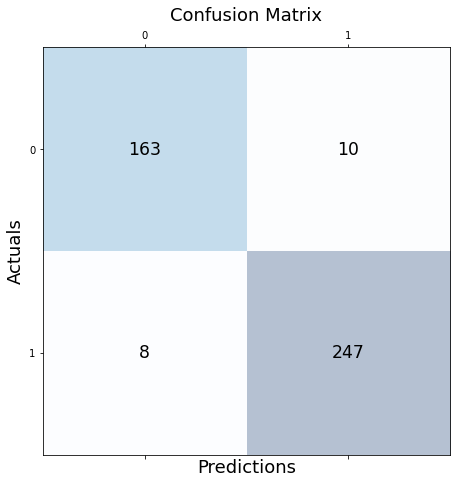

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

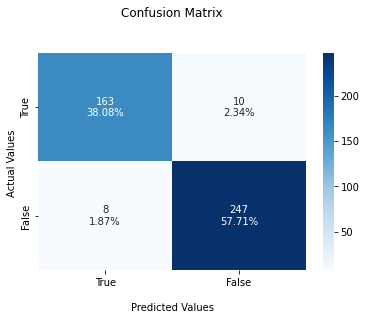

In [58]:
import seaborn as sns

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [59]:
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_true1,pred))

print('Recall: %.3f' % recall_score(y_true1,pred))

print('Accuracy: %.3f' % accuracy_score(y_true1,pred))

print('F1 Score: %.3f' % f1_score(y_true1,pred))

Precision: 0.961
Recall: 0.969
Accuracy: 0.958
F1 Score: 0.965


In [60]:
target_names = ['OKC', 'Non-OKC']
print(classification_report(y_true1,pred, target_names=target_names))

              precision    recall  f1-score   support

         OKC       0.95      0.94      0.95       173
     Non-OKC       0.96      0.97      0.96       255

    accuracy                           0.96       428
   macro avg       0.96      0.96      0.96       428
weighted avg       0.96      0.96      0.96       428



In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_true1, pred)

In [62]:
print('roc_auc_score :', roc_auc_score(y_true1, pred))

roc_auc_score : 0.9554119913861499


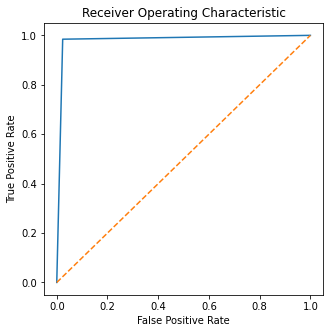

roc_auc_score : 0.9554119913861499


In [63]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score :', roc_auc_score(y_true1, pred))

In [64]:
predictions = cnn.predict(x=test_set, steps=len(test_set), verbose=0)

In [65]:
predictions

array([[8.65383267e-01],
       [6.57980004e-03],
       [7.65152514e-01],
       [6.11583877e-04],
       [1.14044559e-03],
       [9.10120308e-01],
       [8.32476676e-01],
       [3.68198790e-02],
       [9.43312228e-01],
       [8.53242874e-01],
       [1.20493874e-03],
       [8.03891599e-01],
       [9.57626283e-01],
       [1.83584064e-03],
       [6.89171016e-01],
       [8.12180102e-01],
       [4.79296893e-01],
       [1.63293665e-03],
       [6.63649844e-05],
       [9.08866644e-01],
       [8.07573020e-01],
       [6.19820668e-04],
       [6.47385418e-01],
       [9.18357074e-01],
       [2.03137286e-03],
       [4.93905514e-01],
       [8.58569980e-01],
       [8.71186316e-01],
       [9.71695364e-01],
       [4.96851146e-01],
       [1.23034662e-03],
       [1.88278239e-02],
       [5.70694745e-01],
       [3.53739649e-01],
       [9.80640769e-01],
       [7.85507917e-01],
       [9.02760446e-01],
       [2.23757401e-02],
       [3.68245006e-01],
       [4.55031693e-02],


In [66]:
# Evaluate the best model with testing data.
print(cnn.evaluate(x=test_set))

14/14 [==============================] - 2s 160ms/step - loss: 0.3039 - accuracy: 0.8738
[0.30389633774757385, 0.8738317489624023]


In [67]:
np.round(predictions)

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [68]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 188, 188, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 94, 94, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 128)               1

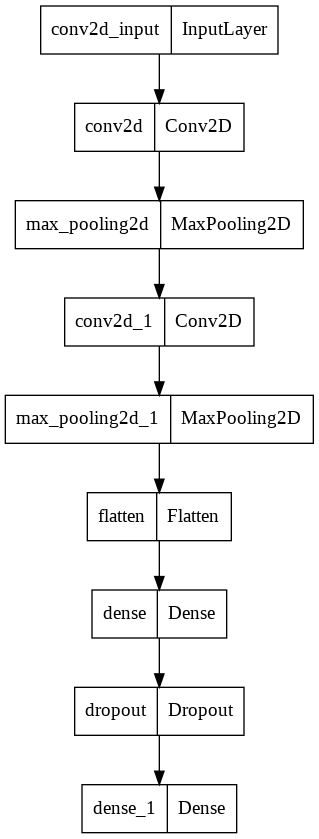

In [69]:
# plot graph
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Normal_CNN_New.png')

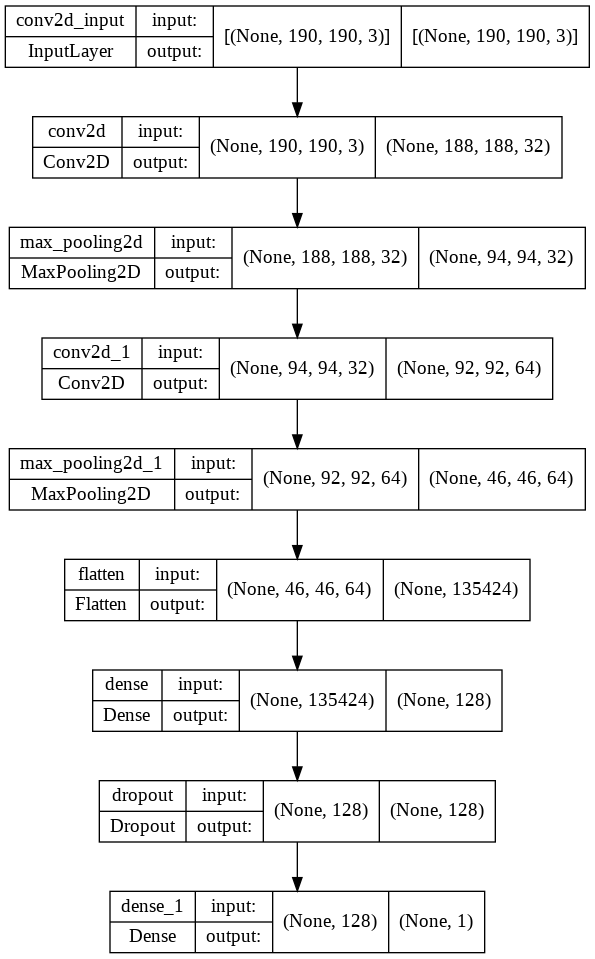

In [70]:
plot_model(cnn, to_file='/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Normal_CNN_Dimension.png', show_shapes=True, show_layer_names=True)

In [71]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 30.6 MB/s 
     |████████████████████████████████| 212 kB 71.6 MB/s 
     |████████████████████████████████| 272 kB 65.8 MB/s 
     |████████████████████████████████| 140 kB 67.6 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 
     |████████████████████████████████| 2.3 MB 55.9 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 60.9 MB/s 
     |████████████████████████████████| 271 kB 23.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.4 MB/s 
     |████████████████████████████████| 68 k

In [72]:
def predict_image(img):
  img_4d=img.reshape(-1,190,190,3)
  result=cd.predict(img_4d)
  print(result)
  if result[0][0] > 0.5:
    a ='OKC'
    return a
  else:
    a = 'Non-OKC'
    return a

In [73]:
import numpy as np
from keras.preprocessing import image
import gradio as gr
import requests

In [74]:
image = gr.inputs.Image(shape=(190,190))
#label = gr.outputs.Label(num_top_classes=2)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [75]:
gr.Interface(fn=predict_image, inputs=image, outputs='text',capture_session='True', interpretation = 'default').launch(share='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://10141.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f8a81b38890>,
 'http://127.0.0.1:7860/',
 'https://10141.gradio.app')